In [ ]:
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
# get image names with full path as list
from undistortImg import camera_calibration, undistort_img

img_path_list = glob.glob('/home/workspace/CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')
mtx, dist = camera_calibration(img_path_list)

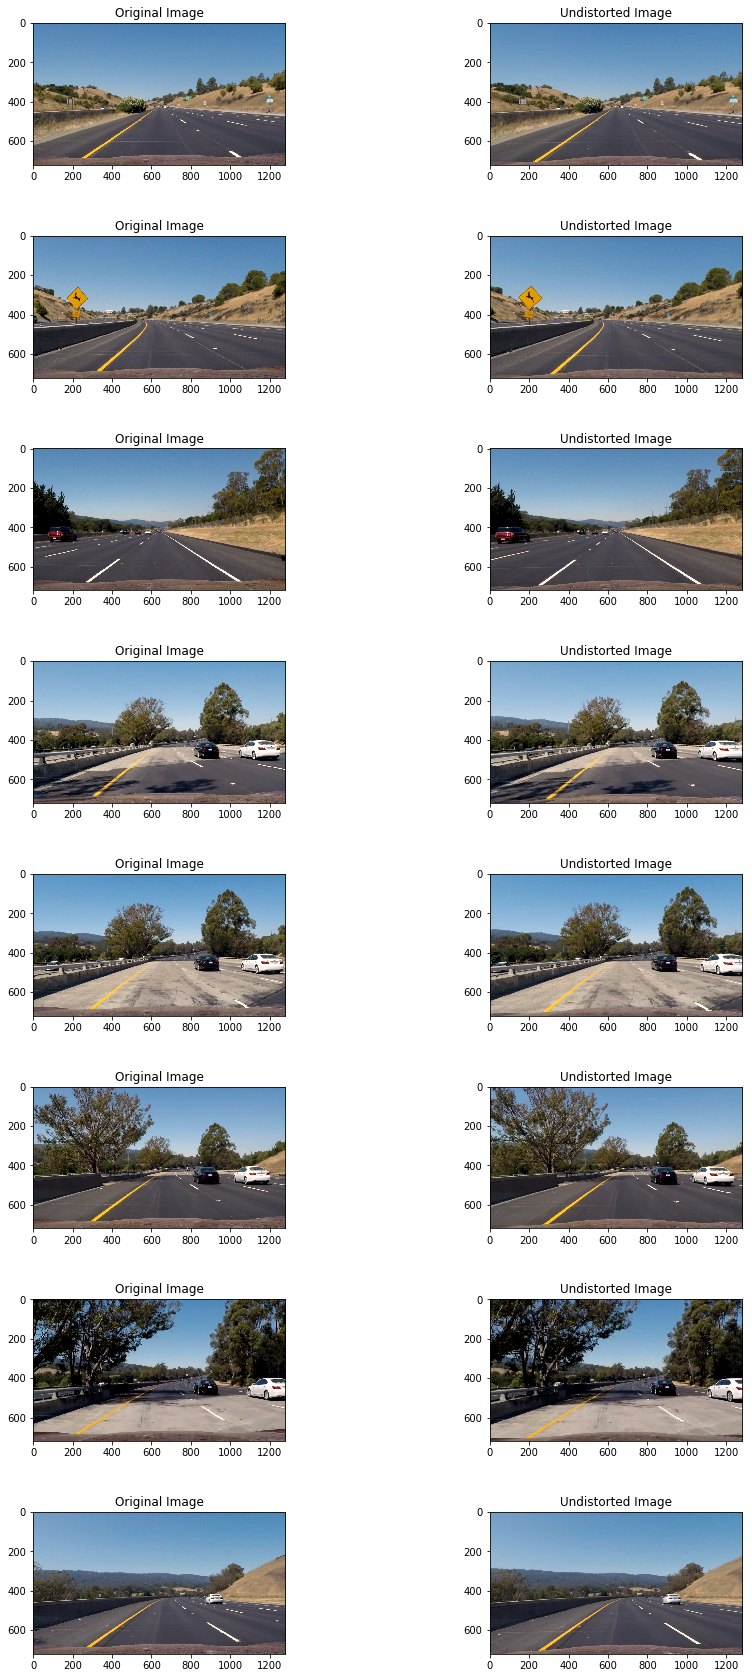

In [3]:
f, axes = plt.subplots(8,2,figsize=(15,30))
f.subplots_adjust(hspace=0.5)



images = glob.glob('test_images/*.jpg') # Reading Images from test_images folder
original_images = []

for index, image in enumerate(images):
    original_img = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    original_images.append(original_img)
    axes[index,0].imshow(original_img)
    axes[index,0].set_title("Original Image")
    undistortedImg = undistort_img(original_img, mtx, dist) # undistorting image 
    axes[index,1].set_title("Undistorted Image")
    axes[index,1].imshow(undistortedImg)

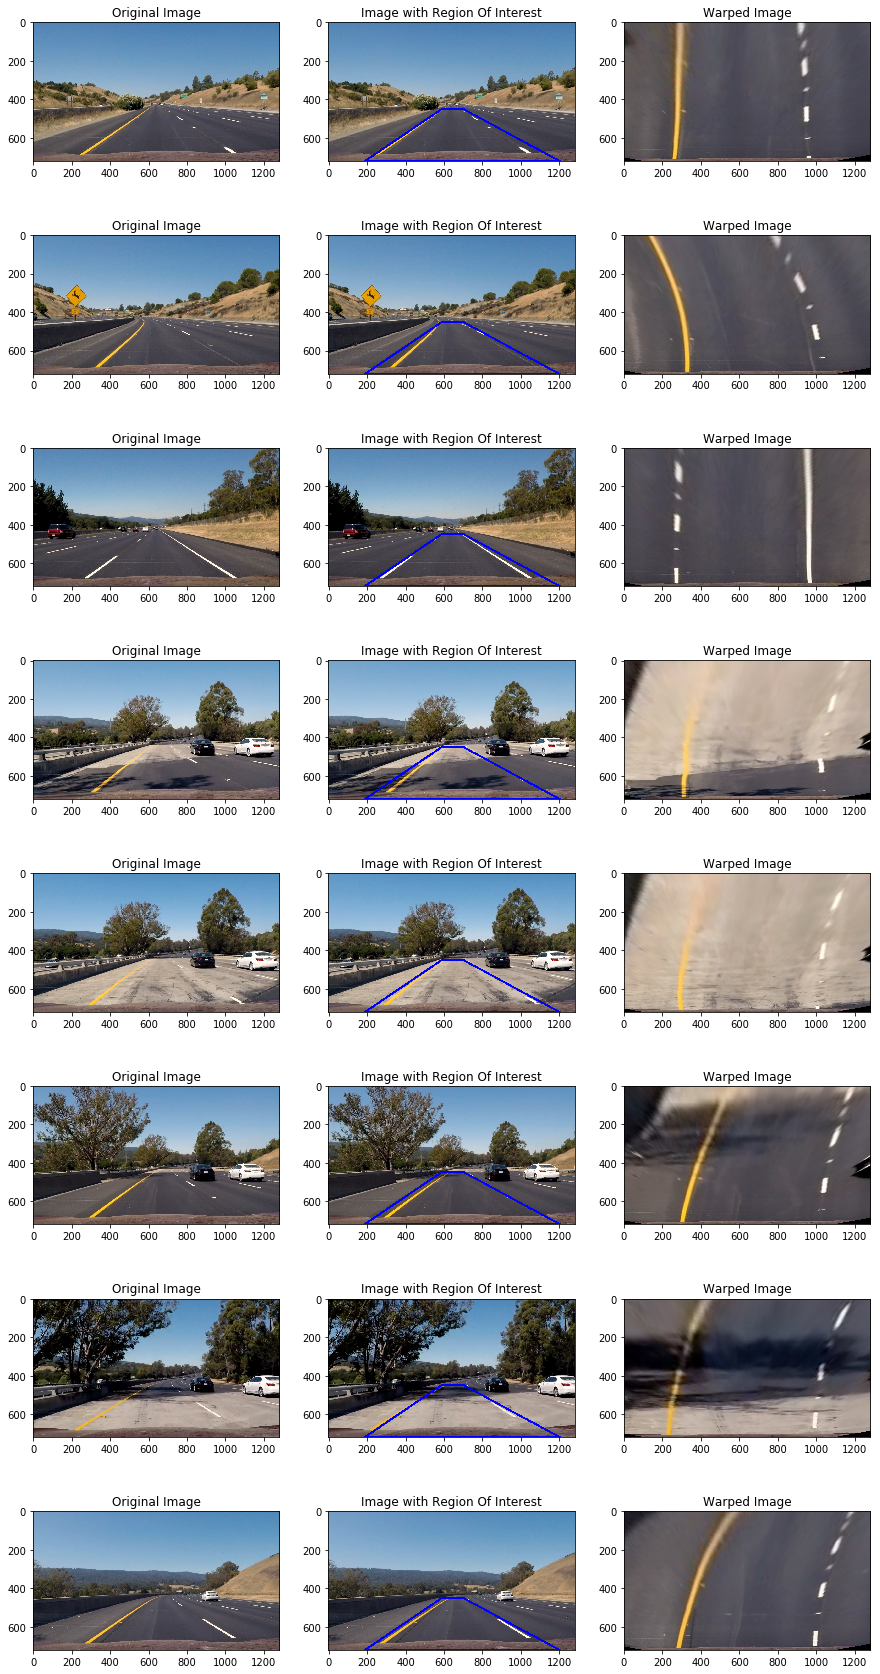

In [4]:
# Testing ROI and Wrap on Test Images
from warpingImage import warp_perspective, ROI

f, axes = plt.subplots(8,3,figsize=(15,30))
f.subplots_adjust(hspace=0.5)

warped_images = []
for index, image in enumerate(images):
    original_image = cv2.cvtColor(cv2.imread(image), cv2.COLOR_BGR2RGB)
    roi_image = original_image.copy()
    axes[index,0].imshow(original_image)
    axes[index,0].set_title("Original Image")
    ROI(roi_image)
    axes[index,1].imshow(roi_image)
    axes[index,1].set_title("Image with Region Of Interest")
    y=original_image.shape[0]
    x=original_image.shape[1]
    warped = warp_perspective(original_image)
    warped_images.append(warped)
    axes[index,2].imshow(warped)
    axes[index,2].set_title("Warped Image")